In [69]:
# Generate a function that create an adjacency matrix for n nodes, k of which are fully connected and the rest are randomly connected with probability p
import numpy as np
def G(n, k, p):
  # Create an empty adjacency matrix
  adj_matrix = np.zeros((n, n))

  # Make the first k nodes fully connected
  adj_matrix[:k, :k] = 1
  # We have no self-connections
  for i in range(k):
    adj_matrix[i, i] = 0
  # Randomly connect the remaining nodes with probability p
  for i in range(n):
    for j in range(k, n):
      if i >= j:
          continue
      if np.random.rand() < p:
        
        adj_matrix[i, j] = 1
        adj_matrix[j, i] = 1
  assert np.equal(adj_matrix, adj_matrix.T).all(), "ERROR"
  return adj_matrix

def getI(A, k):
    M = A - 0.5
    eigenvalues, eigenvectors = np.linalg.eig(M)
    E = np.absolute(eigenvectors[:, np.argmax(eigenvalues)])
    I = np.argpartition(E, -k)[-k:]
    return I

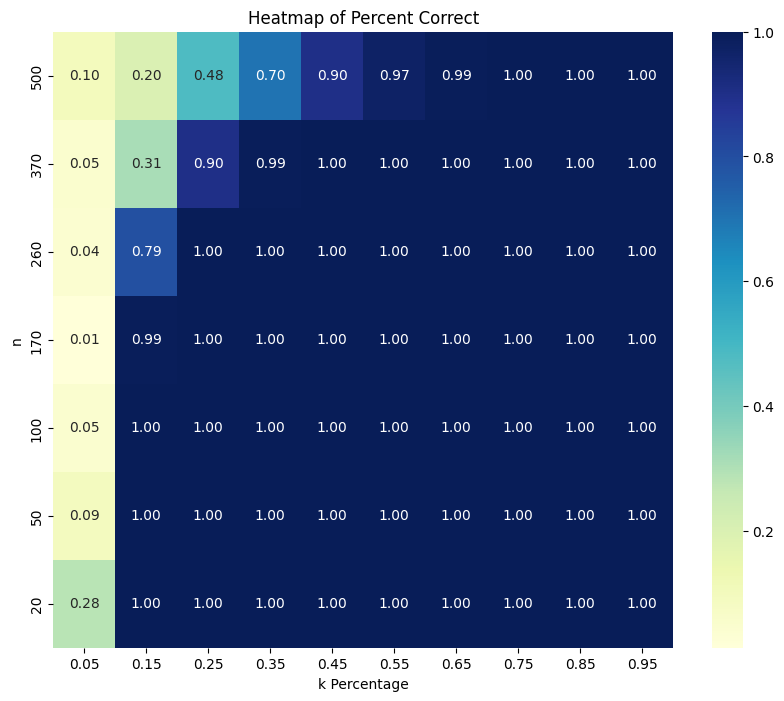

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

batch_size = 10
ns = [10*(i+1)**2+10 for i in range(7)]
k_percentage = [0.1*(i+0.5) for i in range(10)]
number_correct_matrix = np.zeros((batch_size, len(ns), len(k_percentage)))

for b in range(batch_size):
    for i, n in enumerate(ns):
        for j, k_p in enumerate(k_percentage):
            k=max(round(k_p*n), 1)
            A = G(n=n, k=k, p=0.5)
            I = getI(A, k=k)
            number_correct = (I < k).sum() / k
            number_correct_matrix[b, i, j] = number_correct

hmap = number_correct_matrix.mean(0)
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hmap, xticklabels=[f'{kp:.2f}' for kp in k_percentage],
            yticklabels=ns[::-1], cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Percent Correct')
plt.xlabel('k Percentage')
plt.ylabel('n')
plt.show()